# Dynamic Programming - Value Iteration
Implementation of the In-place and Two-array Value Iteration Algorithm from Chapter 4 of Reinforcement Learning: An Introduction - Richard S. Sutton and Andrew G. Barto. 

## Algorithm:
<img src="value_iteration.png"  width="800" height="800">

## Problem:
- 4x4 Gridworld.
- No obstacles.
- Rewards of -1 on all transitions.
- Goal in the top left corner – entering the goal state ends the episode.
- Use a threshold value of 𝜃 = 0.01.

## Implementation
In-place and Two-array value iteration algorithm.

In [390]:
%matplotlib inline

## Environment

In [391]:
import numpy as np
class Environment:
    def __init__(self,height,width,start,goal):
        self.width = width
        self.height = height
        
        # R - possible reward space
        self.R = np.zeros((height,width)) -1

        # Goal
        self.goal = goal
        self.R[self.goal] = 0
        
        # S - possible state states
        self.S = []       
        for index, reward in np.ndenumerate(self.R):
            # Not an obstacle
            if(not np.isnan(reward)):
                self.S.append(index)
        self.S = np.asarray(self.S)

        # A - Actions Space
        self.A = ['u','d','l','r']
        
        # s - Ini State - list for easier indexing
        self.s = list(start)
        
        # r - cumulative Reward
        self.G_t = 0
        
        self.is_done = False
        
        
    def get_rewards(self):
        return self.G_t
    
    def get_possible_rewards(self):
        return self.R
    
    def get_possible_states(self):
        return self.S
    
    def get_state(self):
        return self.s
    
    def get_actions(self):
        return self.A
    
    def get_grid_world(self):
        grid_world = np.chararray((self.width, self.height),unicode=True)
        grid_world[:] = '-'
        grid_world[self.s[0],self.s[1]]= 'a'
        grid_world[self.goal] = 'g'
        return grid_world
     
    def step(self, action,print_info):
        new_s,new_r = self.take_step(self.s,action)
        self.s = new_s
        if(print_info):
            print(f'old_s:{self.s} new_s:{new_s} r_t:{new_r} G_t:{self.G_t}')
            print(f"World \n {self.get_grid_world()}")
        
        self.is_done = (self.s[0] == self.goal[0] and self.s[1] == self.goal[1])
            
        return new_r,new_s,self.is_done
        
    def check_if_s_in_S(self,s):
        for possible_s in self.S:
            if(possible_s[0] == s[0] and possible_s[1] == s[1]):
                return True
        return False
    
    def is_out_of_bounds(self,new_s):
        if((new_s[0] < 0 or new_s[0]>self.height-1) or (new_s[1] < 0 or new_s[1]>self.width-1)):
            return True
        return False
    
    def reward_given_s_a(self,s,a):
        if(a not in self.A):
            raise ValueError('Unknown action', a)
        new_s = s.copy()
        if(a == 'u'):
            new_s[0] -= 1
        if(a == 'd'):
            new_s[0] += 1
        if(a == 'l'):
            new_s[1] -= 1
        if(a == 'r'):
            new_s[1] += 1
         
        # Out of bounds - penalize heavily
        if(self.is_out_of_bounds(new_s)):
            return s,-1000
        # Check Obstacles - penalize heavily
        elif(not self.check_if_s_in_S(new_s)):
            return s,-1000
        return new_s,-1
    
    def update_coords_value(self,point,successor):
        if(not self.is_out_of_bounds(point)):
            self.v[point] = self.get_v(self.R[point],self.R[successor])
            return point
        return None
    
    def get_feasible_actions(self,s):
        feasible_actions = []
        for a in self.A:
            if(a == 'u'):
                new_s[0] -= 1
            if(a == 'd'):
                new_s[0] += 1
            if(a == 'l'):
                new_s[1] -= 1
            if(a == 'r'):
                new_s[1] += 1
            
        if(self.is_out_of_bounds(new_s)):
            return s,-1
    
    # No obstacle
    def is_obstacle(self,s):
        return False
    
    #In-place
    def value_iteration_in_place(self,gamma=1):
        theta = 0.01
        V = np.zeros((self.height,self.width)) 
        iters_states = np.arange(1,len(self.S))
        iterations = 0 
        while(True):
            delta = 0
            for s in self.S[1:]:
                v = V[tuple(s)]
                Q = np.zeros(len(self.A))
                for j,a in enumerate(self.A):                    
                    new_s,new_r = self.reward_given_s_a(s,a)
                    Q[j] = new_r + gamma * V[tuple(new_s)]
               
                V[tuple(s)] = np.amax(Q)
                delta = max(delta,np.fabs(v - V[tuple(s)]))
            iterations += 1
            if(delta < theta):
                break
        return iterations,V
    
    #Two array
    def value_iteration_2_arrays(self,gamma=1):
        theta = 0.01
        V1 = np.zeros((self.height,self.width)) 
        iters_states = np.arange(1,len(self.S))
        iterations = 0
        while(True):
            delta = 0
            V= V1.copy()
            for s in self.S[1:]:
                v = V[tuple(s)]
                Q = np.zeros(len(self.A))
                for j,a in enumerate(self.A):                   
                    new_s,new_r = self.reward_given_s_a(s,a)
                    Q[j] = new_r + gamma * V1[tuple(new_s)]
                V[tuple(s)] = np.amax(Q)
                delta = max(delta,np.fabs(v - V[tuple(s)]))
            iterations += 1
            V1 = V
            if(delta < theta):
                break
        return iterations,V
        

In [392]:
height=4
width=4

env = Environment(height=height,width=width,start=(height-1,0),goal=(0,0))
print(f"World \n {env.get_grid_world()}")

World 
 [['g' '-' '-' '-']
 ['-' '-' '-' '-']
 ['-' '-' '-' '-']
 ['a' '-' '-' '-']]


## Part 1 - Heat Map of Value Function

Value Function 
 [[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -6.]]


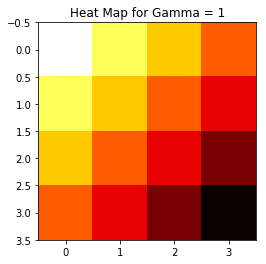

In [393]:
height=4
width=4

env = Environment(height=height,width=width,start=(height-1,0),goal=(0,0))
iterations,V = env.value_iteration_in_place(gamma=1)
print(f"Value Function \n {V}")
fig, ax = plt.subplots(1,1)
ax.imshow(V, cmap='hot', interpolation='nearest')
ax.set_title('Heat Map for Gamma = 1')
plt.show()

## Part 2 - Different  $\gamma$ (range = np.logspace(-0.2, 0, num=20)) for In-place and Two-array value iteration

In-place gamma:0.6309573444801932 iterations:4
In-place gamma:0.6464371632490061 iterations:4
In-place gamma:0.6622967617148326 iterations:4
In-place gamma:0.6785454573393577 iterations:4
In-place gamma:0.6951927961775606 iterations:4
In-place gamma:0.7122485584859914 iterations:4
In-place gamma:0.7297227644686392 iterations:4
In-place gamma:0.7476256801637686 iterations:4
In-place gamma:0.7659678234751837 iterations:4
In-place gamma:0.7847599703514613 iterations:4
In-place gamma:0.8040131611167854 iterations:4
In-place gamma:0.8237387069571016 iterations:4
In-place gamma:0.8439481965654002 iterations:4
In-place gamma:0.8646535029500364 iterations:4
In-place gamma:0.8858667904100825 iterations:4
In-place gamma:0.9076005216818144 iterations:4
In-place gamma:0.9298674652605264 iterations:4
In-place gamma:0.9526807029019819 iterations:4
In-place gamma:0.9760536373079002 iterations:4
In-place gamma:1.0 iterations:4
Two-array gamma:0.6309573444801932 iterations:7
Two-array gamma:0.646437163

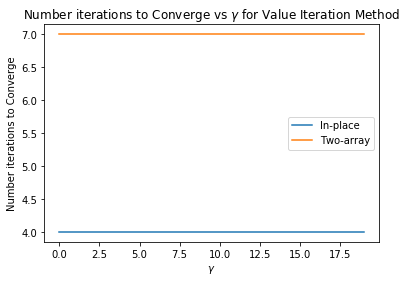

In [394]:
import matplotlib.pyplot as plt

gamma_range = np.logspace(-0.2, 0, num=20)
height=4
width=4
env = Environment(height=height,width=width,start=(height-1,0),goal=(0,0))

iterations_inplace = []
iterations_two_array = []

for gamma in gamma_range:
    iterations,v = env.value_iteration_in_place(gamma=gamma)
    iterations_inplace.append(iterations)
    print(f'In-place gamma:{gamma} iterations:{iterations}')
    
for gamma in gamma_range:
    iterations,v = env.value_iteration_2_arrays(gamma=gamma)
    iterations_two_array.append(iterations)
    print(f'Two-array gamma:{gamma} iterations:{iterations}')
    

plt.plot(iterations_inplace,label='In-place')
plt.plot(iterations_two_array,label='Two-array')
plt.ylabel('Number iterations to Converge')
plt.xlabel('$\gamma$')
plt.title('Number iterations to Converge vs $\gamma$ for Value Iteration Method')
plt.legend()
plt.show()

## Extra -  Different  $\gamma$ (range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]) for In-place and Two-array value iteration

In-place gamma:0.1 iterations:4
In-place gamma:0.2 iterations:4
In-place gamma:0.30000000000000004 iterations:4
In-place gamma:0.4 iterations:4
In-place gamma:0.5 iterations:4
In-place gamma:0.6 iterations:4
In-place gamma:0.7000000000000001 iterations:4
In-place gamma:0.8 iterations:4
In-place gamma:0.9 iterations:4
In-place gamma:1.0 iterations:4
Two-array gamma:0.1 iterations:4
Two-array gamma:0.2 iterations:4
Two-array gamma:0.30000000000000004 iterations:5
Two-array gamma:0.4 iterations:7
Two-array gamma:0.5 iterations:7
Two-array gamma:0.6 iterations:7
Two-array gamma:0.7000000000000001 iterations:7
Two-array gamma:0.8 iterations:7
Two-array gamma:0.9 iterations:7
Two-array gamma:1.0 iterations:7


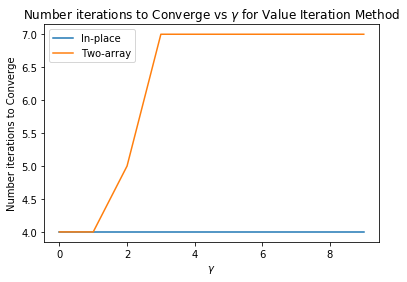

In [395]:
gamma_range = np.arange(0.1,1.1,0.1)
height=4
width=4
env = Environment(height=height,width=width,start=(height-1,0),goal=(0,0))

iterations_inplace = []
iterations_two_array = []

for gamma in gamma_range:
    iterations,v = env.value_iteration_in_place(gamma=gamma)
    iterations_inplace.append(iterations)
    print(f'In-place gamma:{gamma} iterations:{iterations}')
    
for gamma in gamma_range:
    iterations,v = env.value_iteration_2_arrays(gamma=gamma)
    iterations_two_array.append(iterations)
    print(f'Two-array gamma:{gamma} iterations:{iterations}')
    

plt.plot(iterations_inplace,label='In-place')
plt.plot(iterations_two_array,label='Two-array')
plt.ylabel('Number iterations to Converge')
plt.xlabel('$\gamma$')
plt.title('Number iterations to Converge vs $\gamma$ for Value Iteration Method')
plt.legend()
plt.show()
    